# Plotting properties of sources

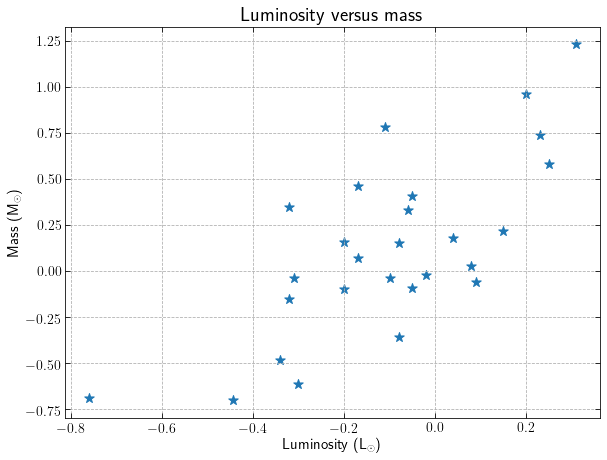

In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['text.usetex'] = True

#loading in data
info=pd.read_csv('/Users/annadignan/ursi2022/sources_info.csv',skiprows=[21, 22, 23])
info=pd.DataFrame(info)

T_eff_list=info['T_eff'].tolist()
unc_T_eff_list=info['uncertainty_Teff'].tolist()

#calculating un-logged uncertainty for temperature
for i,j in zip(T_eff_list,unc_T_eff_list):
    error=np.sqrt( (j)**2 / (1/(i*np.log(10)))**2)
    #print(error)

#plotting some stuff
plt.figure(figsize=(9.6,7.2))
plt.title('Luminosity versus mass',fontsize=20)
plt.xlabel(r'Luminosity (L$\textsubscript{\(\odot\)}$)',fontsize=15)
plt.ylabel(r'Mass (M$\textsubscript{\(\odot\)}$)',fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tick_params(axis='both', direction='in', bottom=True, top=True, left=True, right=True,length=5)
plt.grid('on',linestyle='--')
plt.scatter(info['Log_Mstar'],info['log_Lstar'],s=100,marker='*')

# Error propagation

In [2]:
#import statement
import numpy as np

#calculating uncertainty in distance based on distance-parallax formula
def unc_dist(x,unc_x):
    return np.abs( (-1/(x)**2) * (unc_x))

#calculating uncertainty for TW Cha
print(unc_dist(5.399244102652735,0.019048464079153435)*1000)
#calculating uncertainty for VZ Cha
print(unc_dist(5.200052033325487,0.022361611106632352)*1000)

0.6534224295211416
0.8269661092643261


# Reading in Spitzer spectra

In [3]:
#installing packages needed for spec_utils
!pip install astroquery
!pip install molmass

In [4]:
#importing read_irs from spec_utils
from spec_utils import read_irs

#reading in spectra for different sources
irs1=read_irs('VZCHA',noerror=True,dd='/Users/annadignan/REDUCED/')
irs2=read_irs('AS205A',noerror=True,dd='/Users/annadignan/REDUCED/')
irs3=read_irs('DOAR25',noerror=True,dd='/Users/annadignan/REDUCED/')
irs4=read_irs('GKTAU',noerror=True,dd='/Users/annadignan/REDUCED/')

#making a table of spectrum data for VZ Cha
# from IPython.display import display
# import pandas as pd
# display(irs1)

File /Users/annadignan/REDUCED/AS205A_SH_final.fits not found


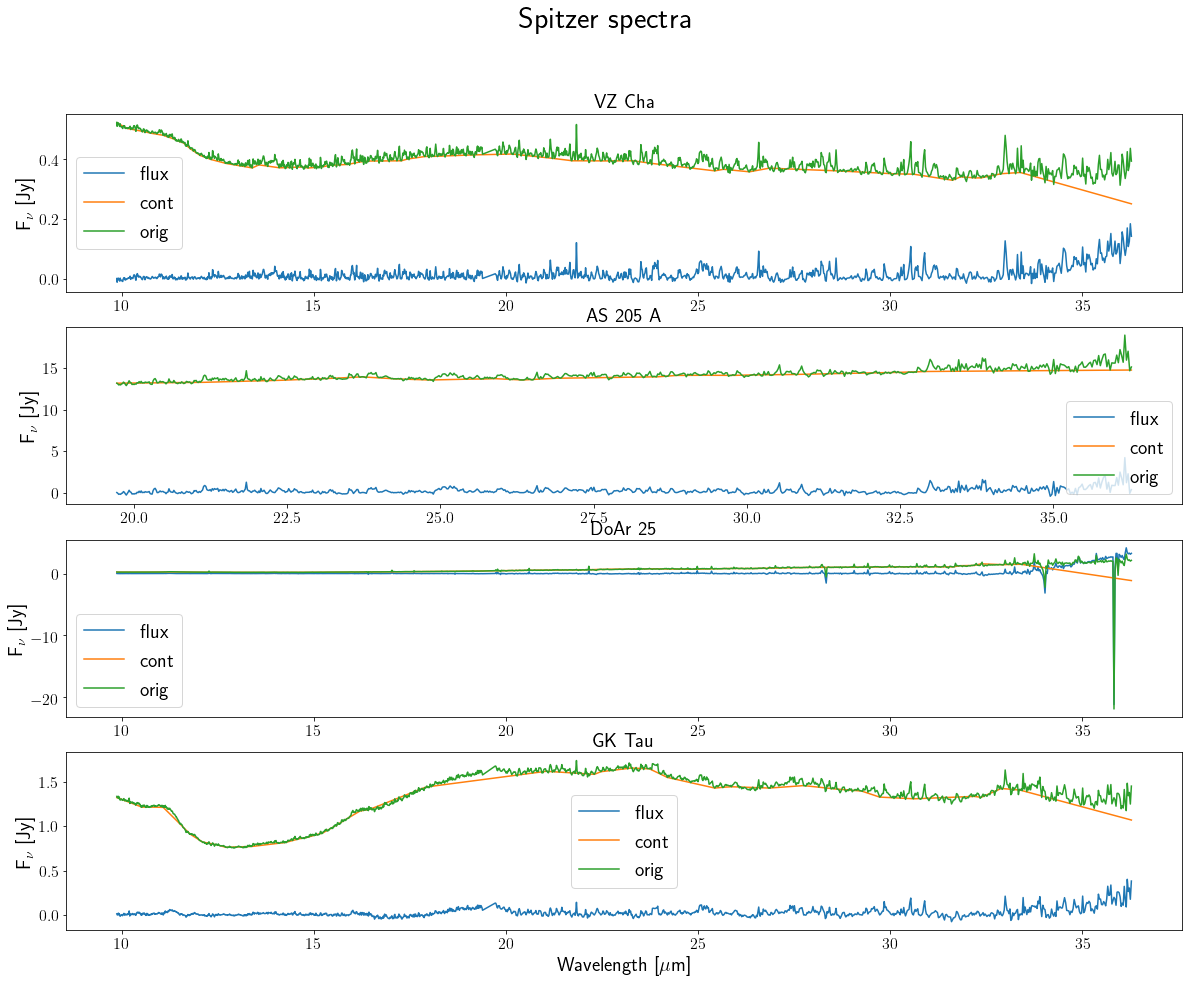

In [5]:
#setting up subplots
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(20,15))
fig.suptitle('Spitzer spectra',fontsize=30)

#plotting spectrum data for VZ Cha
ax1.plot(irs1.wave,irs1.flux,label='flux')
ax1.plot(irs1.wave,irs1.cont,label='cont')
ax1.plot(irs1.wave,irs1.orig,label='orig')
ax1.tick_params(labelsize=16)
ax1.set_title('VZ Cha',fontsize=20)
ax1.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
#ax1.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax1.legend(fontsize=20)

#plotting spectrum data for AS 205 A
ax2.plot(irs2.wave,irs2.flux,label='flux')
ax2.plot(irs2.wave,irs2.cont,label='cont')
ax2.plot(irs2.wave,irs2.orig,label='orig')
ax2.tick_params(labelsize=16)
ax2.set_title('AS 205 A',fontsize=20)
ax2.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
#ax2.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax2.legend(fontsize=20)

#plotting spectrum data for DoAr 25
ax3.plot(irs3.wave,irs3.flux,label='flux')
ax3.plot(irs3.wave,irs3.cont,label='cont')
ax3.plot(irs3.wave,irs3.orig,label='orig')
ax3.tick_params(labelsize=16)
ax3.set_title('DoAr 25',fontsize=20)
ax3.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
#ax3.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax3.legend(fontsize=20)

#plotting spectrum data for GK Tau
ax4.plot(irs4.wave,irs4.flux,label='flux')
ax4.plot(irs4.wave,irs4.cont,label='cont')
ax4.plot(irs4.wave,irs4.orig,label='orig')
ax4.tick_params(labelsize=16)
ax4.set_title('GK Tau',fontsize=20)
ax4.set_ylabel(r'F$_\nu$ [Jy]',fontsize=20)
ax4.set_xlabel('Wavelength [$\mu$m]',fontsize=20)
ax4.legend(fontsize=20)

# Flux fitting example

In [6]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spec_utils import read_irs

!pip install spectools-ir

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:
irs=read_irs('TWCHA',dd='/Users/annadignan/REDUCED/',noerror=True)

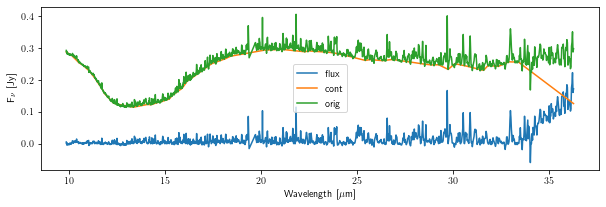

In [8]:
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot(irs.wave,irs.flux,label='flux')
ax1.plot(irs.wave,irs.cont,label='cont')
ax1.plot(irs.wave,irs.orig,label='orig')
ax1.set_ylabel(r'F$_\nu$ [Jy]')
ax1.set_xlabel('Wavelength [$\mu$m]')
ax1.legend()

In [9]:
wave_data = pd.DataFrame([15.17], columns=['wave'])
print(wave_data)

    wave
0  15.17


/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


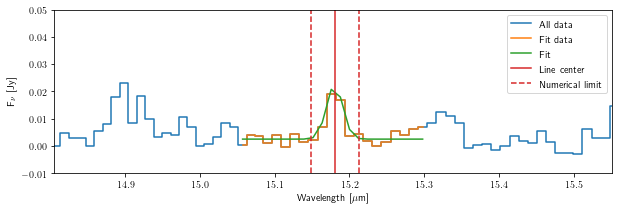

Is this fit okay? [y or n]y


In [10]:
lineflux_data=calc_fluxes(irs.wave,irs.flux,wave_data,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=True, plot=True,ymax=0.05, ymin=-0.01,amp=0.02)

In [34]:
type(lineflux_data['lineflux'])

pandas.core.series.Series

# Calculating water line fluxes for Spitzer data

In [67]:
###using a for loop to calculate water line fluxes for our sources

#removed 3 problematic sources from list for 15.17 and 17.22 microns
#removed: HT Lup, IQ Tau, AS205 A
sources=['DOAR25','FZTAU','GKTAU','GQLUP','GWLUP','IMLUP','RULUP','RYLUP','TWCHA','VZCHA','WAOPH6']

#making a separate list of sources with nicer-looking formatting for final dataframe
sources_formatted=['DoAr 25','FZ Tau','GK Tau','GQ Lup','GW Lup','IM Lup','RU Lup','RY Lup','TW Cha','VZ Cha','WaOph 6']

#initialize empty lists
linefluxes1=[]
linefluxes2=[]
linefluxes3=[]

#here's the meat and potatoes
for s in sources:
    
    #read in data
    irs=read_irs(src_name=s,dd='/Users/annadignan/REDUCED/',noerror=True)
    
    #calculating line fluxes for 15.17 microns
    wave_data1 = pd.DataFrame([15.17], columns=['wave'])
    lineflux_data1=calc_fluxes(irs.wave,irs.flux,wave_data1,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
    #appending results to list
    linefluxes1.append(list(lineflux_data1['lineflux'])[0])
    
    #repeating above process for 17.22 microns
    wave_data2 = pd.DataFrame([17.22], columns=['wave'])
    lineflux_data2=calc_fluxes(irs.wave,irs.flux,wave_data2,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
    linefluxes2.append(list(lineflux_data2['lineflux'])[0])
                       
    #ditto but for 29.85 microns
    wave_data3 = pd.DataFrame([29.85], columns=['wave'])
    lineflux_data3=calc_fluxes(irs.wave,irs.flux,wave_data3,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
    linefluxes3.append(list(lineflux_data3['lineflux'])[0])
                       
#creating a dataframe with results
results=pd.DataFrame(list(zip(linefluxes1,linefluxes2,linefluxes3)), index=sources_formatted, columns=['15.17 microns','17.22 microns','29.85 microns'])
results

/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/annadignan/opt/anaconda3/lib/python3.8/site-packages/spectools_ir/flux_calculator/helpers.py:188: RuntimeWarning: Mean of empty slice
  dwave=np.nanmean(np.diff(myx[mybool]))


,15.17 microns,17.22 microns,29.85 microns
DoAr 25,6.076385e-18,2.625801e-18,0.000000e+00
FZ Tau,2.942444e-17,2.314730e-17,3.084894e-17
GK Tau,5.179954e-18,9.091189e-18,2.419265e-17
GQ Lup,6.282879e-18,3.098705e-18,2.125258e-17
GW Lup,4.430387e-18,1.673290e-18,1.508752e-18
IM Lup,1.343010e-18,3.428049e-18,8.976224e-19
RU Lup,5.827528e-18,3.456530e-17,1.909903e-17
RY Lup,5.246463e-18,-5.687803e-18,-4.872977e-18
TW Cha,6.038842e-18,4.982156e-18,7.810489e-18
VZ Cha,6.333030e-18,6.351667e-18,8.285848e-18


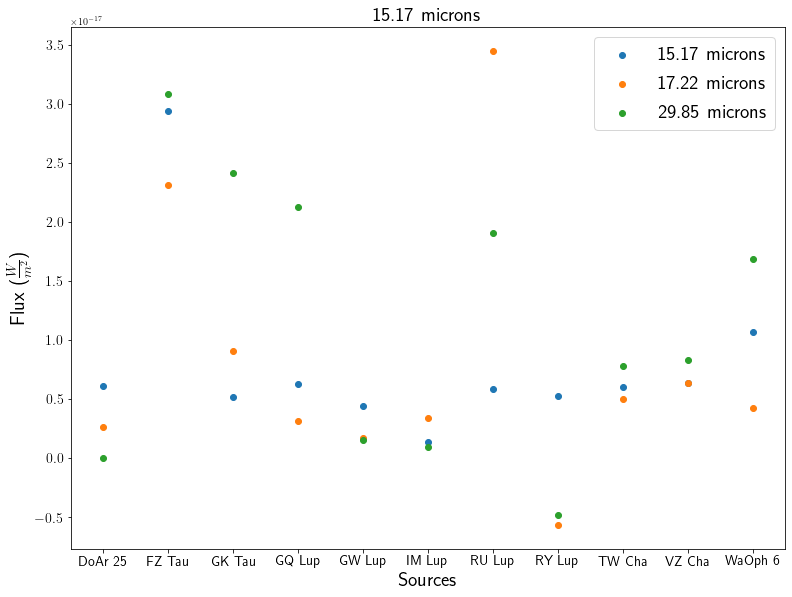

In [53]:
#plotting calculated line fluxes for all three wavelengths

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['15.17 microns'],label='15.17 microns')
plt.scatter(x=results.index,y=results['17.22 microns'],label='17.22 microns')
plt.scatter(x=results.index,y=results['29.85 microns'],label='29.85 microns')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('15.17 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)
plt.legend(fontsize=20)

Text(0, 0.5, 'Flux ($\\frac{W}{m^{2}}$)')

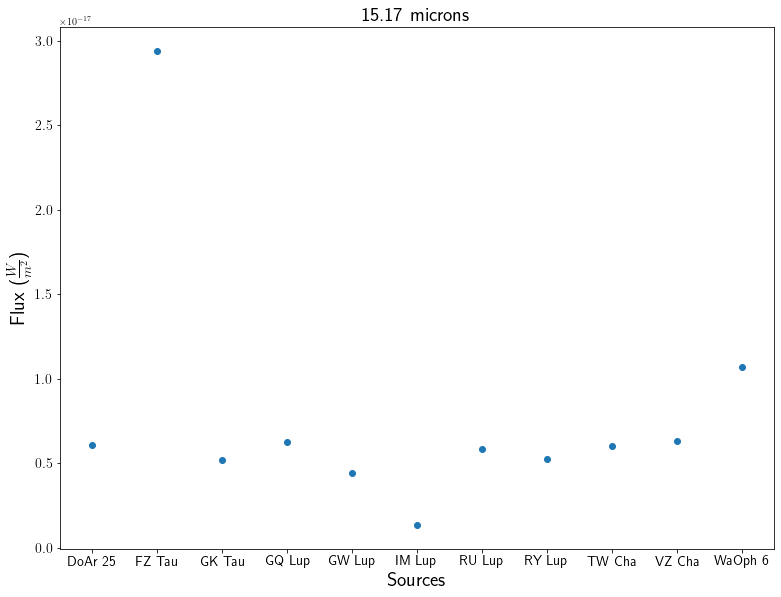

In [47]:
#plotting calculated line fluxes for 15.17 microns

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['15.17 microns'])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('15.17 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)

Text(0, 0.5, 'Flux ($\\frac{W}{m^{2}}$)')

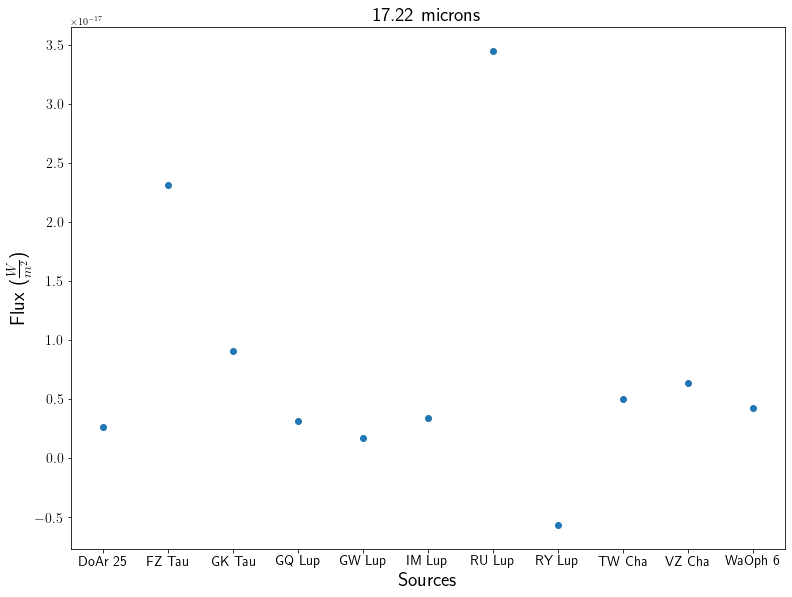

In [49]:
#plotting calculated line fluxes for 17.22 microns

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['17.22 microns'])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('17.22 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)

Text(0, 0.5, 'Flux ($\\frac{W}{m^{2}}$)')

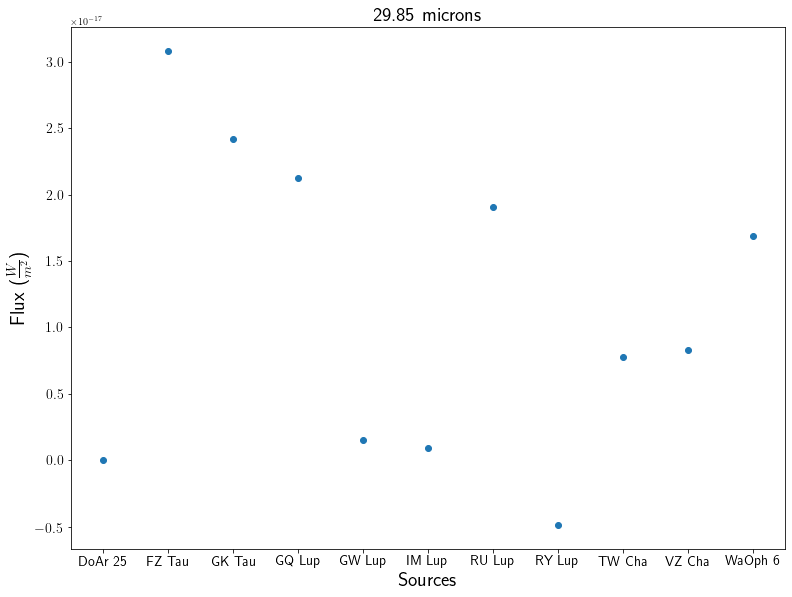

In [48]:
#plotting calculated line fluxes for 29.85 microns

plt.figure(figsize=(12.8,9.6))
plt.scatter(x=results.index,y=results['29.85 microns'])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('29.85 microns',fontsize=20)
plt.xlabel('Sources',fontsize=20)
plt.ylabel(r'Flux ($\frac{W}{m^{2}}$)',fontsize=20)

In [66]:
###investigating three problematic sources

irs_bad=read_irs('IQTAU',dd='/Users/annadignan/REDUCED/',noerror=True)
wave_data_bad = pd.DataFrame([29.85], columns=['wave'])
print(wave_data_bad)
lineflux_data_bad=calc_fluxes(irs_bad.wave,irs_bad.flux,wave_data_bad,v_dop=200,fwhm_v=500.,sep_v=2500.,cont=0,vet_fits=False, plot=False,ymax=0.05, ymin=-0.01,amp=0.02)
lineflux_data_bad

ValueError: operands could not be broadcast together with shapes (878,) (879,) 